### Final Statistics

11. Calculate final statistics to compare the different tilted portfolios together with the index. The typical output should be a price chart (price must be restored starting from 100) of the portfolio and the index, or all the portfolios with the index, and tables reporting average return of each portfolio, volatility, the ratio
of the two.

Imports

In [1]:
import numpy as np
import pandas as pd

import time
import datetime as dt # for defining dates

import matplotlib.pyplot as plt # plotting
import matplotlib.dates as mdates # styling dates
%matplotlib inline

from functions import *

In [2]:
import os
import math
import statistics as st

In [3]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

Constants

In [4]:
# size of the window used for rolling regression
sample_size = 180

# money to invest
investment = 100

Read Data

In [5]:
final_stats = pd.read_csv('../data/ES50_final_stats.csv')
final_stats = final_stats.drop(['Unnamed: 0'], axis=1)
final_stats

,Portfolio,Annualized Returns,Annualized Volatility
0,NDX ES50,0.046959,0.244318
1,Max R2,0.068851,0.366251
2,Max Absolute Returns,0.174382,0.339564
3,Min Total Risk,0.132466,0.292314
4,Min Systematic Risk,0.132466,0.292314
5,Max Specific Risk,0.116910,0.386849
6,Max Beta,0.092490,0.384003


In [6]:
df_ndx = pd.read_csv('../data/raw/ES50_index.csv', header=1)
df_ndx = df_ndx.iloc[:, : 2]
df_ndx = df_ndx.drop([0])
df_ndx = df_ndx.rename(columns={"Symbols": "Date", "^STOXX50E": "EuroStoxx50"})
df_ndx['Date'] = pd.to_datetime(df_ndx['Date'])

In [7]:
ES50_log_returns = pd.read_csv('../data/ES50_log-ret.csv')
ES50_log_returns = ES50_log_returns.drop(['Unnamed: 0'], axis=1)

In [8]:
ES50_weekly_log_returns = pd.read_csv('../data/ES50_weekly_log-ret.csv')
ES50_weekly_log_returns = ES50_weekly_log_returns.drop(['Unnamed: 0'], axis=1)

Annual Returns and Volatility

In [9]:
# multiply by 100 (%)
final_stats['Annualized Returns'] = final_stats['Annualized Returns'].apply(lambda x: x * 100)
final_stats['Annualized Volatility'] = final_stats['Annualized Volatility'].apply(lambda x: x * 100)

# round decimal values
final_stats['Annualized Returns'] = final_stats['Annualized Returns'].round(2)
final_stats['Annualized Volatility'] = final_stats['Annualized Volatility'].round(2)

final_stats

,Portfolio,Annualized Returns,Annualized Volatility
0,NDX ES50,4.70,24.43
1,Max R2,6.89,36.63
2,Max Absolute Returns,17.44,33.96
3,Min Total Risk,13.25,29.23
4,Min Systematic Risk,13.25,29.23
5,Max Specific Risk,11.69,38.68
6,Max Beta,9.25,38.40


Price Chart

Text(0.5, 1.0, 'Euro Stoxx 50 Index Price')

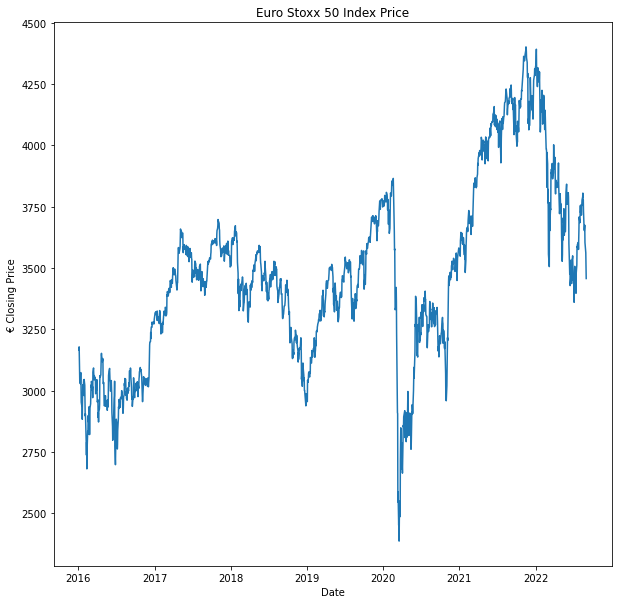

In [10]:
# index chart
df_ndx.set_index(df_ndx['Date'], inplace=True)

plt.figure(figsize=(10,10))
plt.plot(df_ndx.index, df_ndx['EuroStoxx50'])
plt.xlabel("Date")
plt.ylabel("€ Closing Price")
plt.title("Euro Stoxx 50 Index Price")

Calculate Cumulative Returns

In [11]:
ndx_selected = ['EuroStoxx50']

In [12]:
max_r2_selected = ['ALV.DE', 'CS.PA', 'BNP.PA', 'INGA.AS', 'SAN.MC', 'BAS.DE', 'BBVA.MC', 'BMW.DE', 'SIE.DE', 'MUV2.DE']
max_absolute_returns_selected = ['ADS.DE', 'SIE.DE', 'IFX.DE', 'VNA.DE', 'KER.PA', 'SU.PA', 'DG.PA', 'ASML.AS', 'RMS.PA', 'SAP.DE']
min_total_risk_selected = ['LIN.DE', 'ADS.DE', 'AD.AS', 'VNA.DE', 'BN.PA', 'RI.PA', 'RMS.PA', 'OR.PA', 'IBE.MC', 'ABI.BR']
min_systematic_risk_selected = ['LIN.DE', 'ADS.DE', 'AD.AS', 'VNA.DE', 'BN.PA', 'RI.PA', 'RMS.PA', 'OR.PA', 'IBE.MC', 'ABI.BR']
max_specific_risk_selected = ['VOW.DE', 'SAN.MC', 'BBVA.MC', 'IFX.DE', 'ADS.DE', 'SAF.PA', 'VNA.DE', 'INGA.AS', 'ASML.AS', 'DB1.DE']
max_beta_selected = ['SAN.MC', 'BBVA.MC', 'BNP.PA', 'INGA.AS', 'CS.PA', 'VOW.DE', 'BMW.DE', 'SU.PA', 'ALV.DE', 'MBG.DE']

In [13]:
ndx_pfl = ES50_weekly_log_returns[ndx_selected]

In [14]:
# portfolio building
max_r2_pfl = ES50_weekly_log_returns[max_r2_selected]
max_absolute_returns_pfl = ES50_weekly_log_returns[max_absolute_returns_selected]
min_total_risk_pfl = ES50_weekly_log_returns[min_total_risk_selected]
min_systematic_risk_pfl = ES50_weekly_log_returns[min_systematic_risk_selected]
max_specific_risk_pfl = ES50_weekly_log_returns[max_specific_risk_selected]
max_beta_pfl = ES50_weekly_log_returns[max_beta_selected]

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# add column to calculate cumulative sum

ndx_pfl['ndx_cumsum'] = ndx_pfl.sum(axis=1)
ndx_pfl['ndx_cumsum'] = ndx_pfl['ndx_cumsum'] / 1

max_r2_pfl['max_r2_cumsum'] = max_r2_pfl.sum(axis=1)
max_r2_pfl['max_r2_cumsum'] = max_r2_pfl['max_r2_cumsum'] / 10

max_absolute_returns_pfl['max_absolute_returns_cumsum'] = max_absolute_returns_pfl.sum(axis=1)
max_absolute_returns_pfl['max_absolute_returns_cumsum'] = max_absolute_returns_pfl['max_absolute_returns_cumsum'] / 10

min_total_risk_pfl['min_total_risk_cumsum'] = min_total_risk_pfl.sum(axis=1)
min_total_risk_pfl['min_total_risk_cumsum'] = min_total_risk_pfl['min_total_risk_cumsum'] / 10

min_systematic_risk_pfl['min_systematic_risk_cumsum'] = min_systematic_risk_pfl.sum(axis=1)
min_systematic_risk_pfl['min_systematic_risk_cumsum'] = min_systematic_risk_pfl['min_systematic_risk_cumsum'] / 10

max_specific_risk_pfl['max_specific_risk_cumsum'] = max_specific_risk_pfl.sum(axis=1)
max_specific_risk_pfl['max_specific_risk_cumsum'] = max_specific_risk_pfl['max_specific_risk_cumsum'] / 10

max_beta_pfl['max_beta_cumsum'] = max_beta_pfl.sum(axis=1)
max_beta_pfl['max_beta_cumsum'] = max_beta_pfl['max_beta_cumsum'] / 10

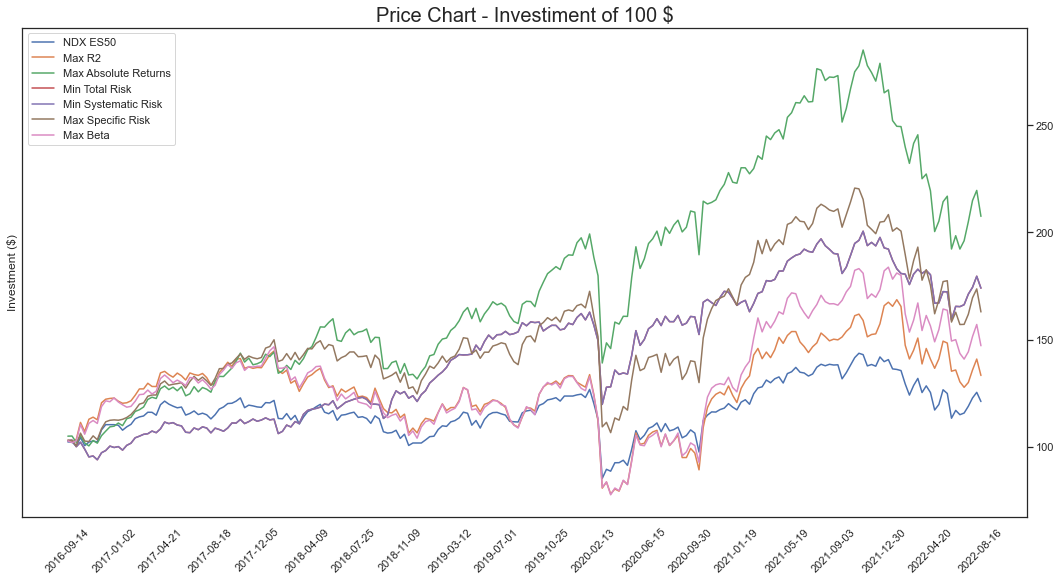

In [26]:
# plot price chart

# basic
sns.set(rc={'figure.figsize':(18,9)})
sns.set(style='white')

# dates range to plot
dates = np.array(ES50_weekly_log_returns['Date']) 
dates_to_show = [dates[i] for i in np.linspace(0, len(dates) - 1, 20).astype(int)]

# legend
legends = ['NDX ES50', 'Max R2', 'Max Absolute Returns', 'Min Total Risk', 'Min Systematic Risk', 'Max Specific Risk', 'Max Beta']

# index cumulative returns
ndx_pfl_returns = np.array(ndx_pfl['ndx_cumsum'])
ndx_pfl_cumulative_returns = get_cumulative_returns(np.array(ndx_pfl_returns)) * investment

# portfolios cumulative returns
max_r2_pfl_returns = np.array(max_r2_pfl['max_r2_cumsum'])
max_r2_pfl_cumulative_returns = get_cumulative_returns(np.array(max_r2_pfl_returns)) * investment

max_absolute_returns_pfl_returns = np.array(max_absolute_returns_pfl['max_absolute_returns_cumsum'])
max_absolute_returns_pfl_cumulative_returns = get_cumulative_returns(np.array(max_absolute_returns_pfl_returns)) * investment

min_total_risk_pfl_returns = np.array(min_total_risk_pfl['min_total_risk_cumsum'])
min_total_risk_pfl_cumulative_returns = get_cumulative_returns(np.array(min_total_risk_pfl_returns)) * investment

min_systematic_risk_pfl_returns = np.array(min_systematic_risk_pfl['min_systematic_risk_cumsum'])
min_systematic_risk_pfl_cumulative_returns = get_cumulative_returns(np.array(min_systematic_risk_pfl_returns)) * investment

max_specific_risk_pfl_returns = np.array(max_specific_risk_pfl['max_specific_risk_cumsum'])
max_specific_risk_pfl_cumulative_returns = get_cumulative_returns(np.array(max_specific_risk_pfl_returns)) * investment

max_beta_pfl_returns = np.array(max_beta_pfl['max_beta_cumsum'])
max_beta_pfl_cumulative_returns = get_cumulative_returns(np.array(max_beta_pfl_returns)) * investment

# lines to plot
l = sns.lineplot(x = dates, y = ndx_pfl_cumulative_returns)
l = sns.lineplot(x = dates, y = max_r2_pfl_cumulative_returns)
l = sns.lineplot(x = dates, y = max_absolute_returns_pfl_cumulative_returns)
l = sns.lineplot(x = dates, y = min_total_risk_pfl_cumulative_returns)
l = sns.lineplot(x = dates, y = min_systematic_risk_pfl_cumulative_returns)
l = sns.lineplot(x = dates, y = max_specific_risk_pfl_cumulative_returns)
l = sns.lineplot(x = dates, y = max_beta_pfl_cumulative_returns)

# config
l.yaxis.tick_right()
l.set_xticks(dates_to_show)
l.set_xticklabels(dates_to_show, rotation=45)
l.set_ylabel('Investment ($)')
l.set_title(f'Price Chart - Investiment of {investment} $', size=20)
l.legend(labels=legends, loc='upper left')

plt.show()

Efficiency

Efficiency is a good way to simply interpret the whole market of investments [efficiency = $\frac{R_A}{\sigma_A}$]

Typical efficiency = 0,45 (45% risk you will take) compare the index of a portfolio with the efficiency

In [18]:
efficiency_df = final_stats

In [19]:
# calculate efficiency
efficiency_df['Efficiency'] = efficiency_df['Annualized Returns'] / efficiency_df['Annualized Volatility']

# round decimal values
final_stats['Efficiency'] = final_stats['Efficiency'].round(2)

In [20]:
efficiency_df

,Portfolio,Annualized Returns,Annualized Volatility,Efficiency
0,NDX ES50,4.70,24.43,0.19
1,Max R2,6.89,36.63,0.19
2,Max Absolute Returns,17.44,33.96,0.51
3,Min Total Risk,13.25,29.23,0.45
4,Min Systematic Risk,13.25,29.23,0.45
5,Max Specific Risk,11.69,38.68,0.30
6,Max Beta,9.25,38.40,0.24
